## Test for Normality

- Automatically not normal since there is a categorical data type column (weathercode (wmo code))

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Yield_Weather.csv')
df = df.drop(columns=['Unnamed: 0'])

In [3]:
df

,Year,Location,Production (mt),Area (ha),Yield (mt/ha),weathercode (wmo code),temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),rain (mm),...,cloudcover (%),et0_fao_evapotranspiration (mm),vapor_pressure_deficit (kPa),windspeed_10m (km/h),winddirection_10m (°),windgusts_10m (km/h),soil_temperature_28_to_100cm (°C),soil_moisture_28_to_100cm (m³/m³),direct_radiation (W/m²),diffuse_radiation (W/m²)
0,1990,ZAMBOANGA DEL NORTE,41.14,91.0,0.452088,3,23.486279,86.200457,20.899235,0.365126,...,70.154680,0.153233,0.435739,6.732808,144.312329,19.894932,25.227021,0.401853,151.119064,70.720548
1,1991,ZAMBOANGA DEL NORTE,53.28,108.0,0.493333,3,23.378607,86.403995,20.856210,0.292443,...,71.524658,0.153091,0.422427,6.505616,138.691096,19.141393,25.074669,0.404063,147.845890,75.080251
2,1992,ZAMBOANGA DEL NORTE,71.34,114.0,0.625789,3,23.253153,86.111225,20.664014,0.320560,...,66.843010,0.154016,0.430523,5.957605,143.278233,18.114481,25.086202,0.399902,149.374203,74.632628
3,1993,ZAMBOANGA DEL NORTE,78.88,123.0,0.641301,3,23.086187,88.171575,20.931313,0.413082,...,72.979110,0.147360,0.360022,5.702637,151.702854,17.351541,24.700765,0.450554,141.238014,75.799315
4,1994,ZAMBOANGA DEL NORTE,85.71,128.0,0.669609,3,23.100217,88.401142,20.990674,0.391427,...,76.482534,0.144709,0.352926,5.919954,154.063813,18.403128,24.679966,0.438253,139.645320,73.633562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,2018,TAWI-TAWI,0.00,0.0,NaN,1,25.101781,81.959703,21.787637,0.180468,...,43.909932,0.164605,0.577837,13.415742,174.348288,21.051290,26.616324,0.000000,164.635959,71.210502
953,2019,TAWI-TAWI,0.00,0.0,NaN,1,25.174361,81.307420,21.708082,0.107192,...,36.225799,0.174063,0.600727,13.434920,150.258790,20.562249,26.571689,0.000000,184.635274,65.579452
954,2020,TAWI-TAWI,0.00,0.0,NaN,1,25.272291,80.921790,21.740745,0.174499,...,43.682491,0.165880,0.617793,12.067725,143.826617,19.564526,26.978802,0.000000,165.257628,68.485087
955,2021,TAWI-TAWI,0.00,0.0,NaN,1,25.110696,81.587671,21.717591,0.244247,...,47.829110,0.159237,0.591193,12.753904,179.280365,20.301929,26.899030,0.000000,150.401142,73.859817


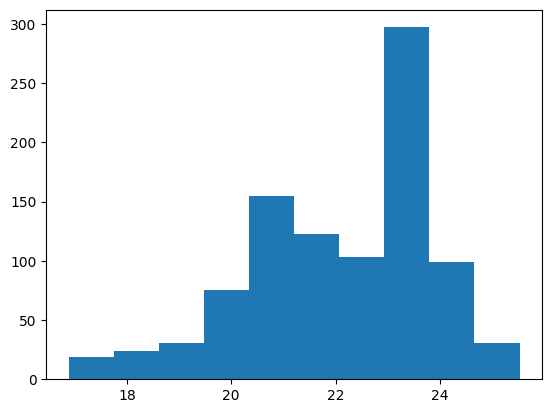

In [16]:
plt.hist(df['dewpoint_2m (°C)'])
plt.show()

In [4]:
df.columns

Index(['Year', 'Location', 'Production (mt)', 'Area (ha)', 'Yield (mt/ha)',
       'weathercode (wmo code)', 'temperature_2m (°C)',
       'relativehumidity_2m (%)', 'dewpoint_2m (°C)', 'rain (mm)',
       'surface_pressure (hPa)', 'cloudcover (%)',
       'et0_fao_evapotranspiration (mm)', 'vapor_pressure_deficit (kPa)',
       'windspeed_10m (km/h)', 'winddirection_10m (°)', 'windgusts_10m (km/h)',
       'soil_temperature_28_to_100cm (°C)',
       'soil_moisture_28_to_100cm (m³/m³)', 'direct_radiation (W/m²)',
       'diffuse_radiation (W/m²)'],
      dtype='object')

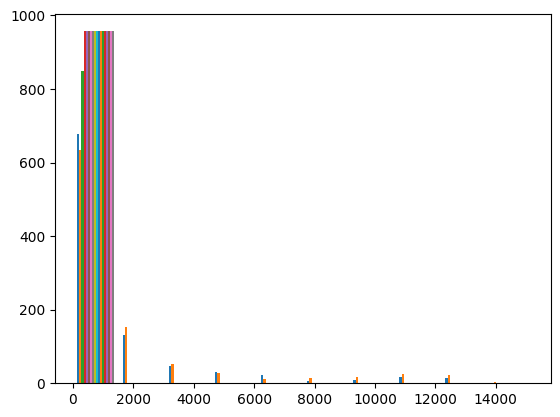

In [5]:
plt.hist(df.drop(columns=['Location', 'Year', 'weathercode (wmo code)']))
plt.show()

## Outlier Detection Using Z-score value

In [6]:
df.dtypes

Year                                   int64
Location                              object
Production (mt)                      float64
Area (ha)                            float64
Yield (mt/ha)                        float64
weathercode (wmo code)                object
temperature_2m (°C)                  float64
relativehumidity_2m (%)              float64
dewpoint_2m (°C)                     float64
rain (mm)                            float64
surface_pressure (hPa)               float64
cloudcover (%)                       float64
et0_fao_evapotranspiration (mm)      float64
vapor_pressure_deficit (kPa)         float64
windspeed_10m (km/h)                 float64
winddirection_10m (°)                float64
windgusts_10m (km/h)                 float64
soil_temperature_28_to_100cm (°C)    float64
soil_moisture_28_to_100cm (m³/m³)    float64
direct_radiation (W/m²)              float64
diffuse_radiation (W/m²)             float64
dtype: object

In [7]:
df['Yield (mt/ha)'] = df['Yield (mt/ha)'].fillna(0)

In [8]:
df['Yield (mt/ha)'].isnull().sum()

0

In [9]:
df.isnull().values.any()

False

In [10]:
df.describe()

,Year,Production (mt),Area (ha),Yield (mt/ha),temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),rain (mm),surface_pressure (hPa),cloudcover (%),et0_fao_evapotranspiration (mm),vapor_pressure_deficit (kPa),windspeed_10m (km/h),winddirection_10m (°),windgusts_10m (km/h),soil_temperature_28_to_100cm (°C),soil_moisture_28_to_100cm (m³/m³),direct_radiation (W/m²),diffuse_radiation (W/m²)
count,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000
mean,2006.000000,1569.145266,2049.406959,0.672988,24.991554,84.790970,22.126121,0.301119,971.342668,58.065295,0.152774,0.523420,6.706778,167.901813,18.107908,26.154387,0.376344,139.248642,72.933381
std,9.526883,2688.296257,3153.525205,0.546095,2.098423,2.782775,1.757050,0.113049,41.075035,9.047516,0.011968,0.134181,3.932277,25.848587,3.473441,1.969559,0.095617,15.195995,3.379131
min,1990.000000,0.000000,0.000000,0.000000,19.513037,74.418607,16.883071,0.079349,875.282320,32.043830,0.125298,0.240229,2.694820,102.151370,11.438721,20.910622,0.000000,102.877854,60.199886
25%,1998.000000,24.470000,80.000000,0.227895,23.408071,82.597603,20.821004,0.216883,940.075808,52.296804,0.144041,0.425146,4.373390,147.480305,16.027641,24.714754,0.358457,128.430442,70.765411
50%,2006.000000,320.340000,802.000000,0.650000,25.546221,84.784153,22.763559,0.290822,984.133733,57.572746,0.151785,0.536473,5.370148,167.572831,17.547374,26.615468,0.400144,138.774087,72.816438
75%,2014.000000,1780.810000,2650.000000,0.963192,26.629178,86.853425,23.504760,0.371826,1008.225422,63.645890,0.160162,0.614129,7.670365,185.453324,19.259085,27.446884,0.431587,147.594863,75.388014
max,2022.000000,14373.880000,15227.000000,3.033851,28.487750,91.361530,25.526416,0.777489,1010.695091,81.984817,0.195507,1.089404,20.040411,240.453995,29.767032,31.171849,0.481368,191.157420,81.203539


### Production (mt)

In [11]:
df['Production (mt)'].describe()

count      957.000000
mean      1569.145266
std       2688.296257
min          0.000000
25%         24.470000
50%        320.340000
75%       1780.810000
max      14373.880000
Name: Production (mt), dtype: float64

In [12]:
mean = np.mean(df['Production (mt)'])
std = np.std(df['Production (mt)'])
 
threshold = 3
outliers = []
for x in df['Production (mt)']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
        
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)

Mean:  1569.1452664576802

Standard deviation:  2686.891346634448

Outliers  :  [11117.13, 13159.67, 14373.88, 13462.18, 13056.48, 11386.97, 10703.48, 10597.11, 9990.29, 10078.15, 10121.33, 10026.37, 11718.27, 11999.41, 11997.91, 11850.15, 12723.66, 12888.9, 12570.29, 12085.42, 11796.03, 10031.99, 10706.38, 11113.98, 11660.93, 11907.61, 12213.84, 12462.98, 12199.23, 12506.3, 13224.63, 12709.82, 12207.25, 11984.85, 10875.79, 10006.93, 10785.45, 11512.57]


In [13]:
upper_limit = df['Production (mt)'].mean() + 3*df['Production (mt)'].std()
lower_limit = df['Production (mt)'].mean() - 3*df['Production (mt)'].std()

df['Production (mt)'] = np.where(
    df['Production (mt)']>upper_limit,
    upper_limit,
    np.where(
        df['Production (mt)']<lower_limit,
        lower_limit,
        df['Production (mt)']
    )
)

In [14]:
df['Production (mt)'].describe()

count     957.000000
mean     1485.842950
std      2377.530043
min         0.000000
25%        24.470000
50%       320.340000
75%      1780.810000
max      9634.034038
Name: Production (mt), dtype: float64

### Area (ha)

In [15]:
df['Area (ha)'].describe()

count      957.000000
mean      2049.406959
std       3153.525205
min          0.000000
25%         80.000000
50%        802.000000
75%       2650.000000
max      15227.000000
Name: Area (ha), dtype: float64

In [16]:
mean = np.mean(df['Area (ha)'])
std = np.std(df['Area (ha)'])
 
threshold = 3
outliers = []
for x in df['Area (ha)']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)

Mean:  2049.406959247649

Standard deviation:  3151.877164765096

Outliers  :  [12752.0, 12752.0, 12720.0, 12715.0, 12135.0, 11867.0, 11650.0, 11660.0, 11660.0, 11543.0, 11513.0, 12280.0, 12284.0, 12288.0, 12303.0, 12312.0, 12349.0, 12344.0, 12484.0, 12484.0, 12360.0, 12360.0, 12375.0, 12375.0, 13025.0, 13225.0, 13300.0, 13300.0, 13370.0, 13370.0, 14707.0, 14727.0, 15227.0]


In [17]:
upper_limit = df['Area (ha)'].mean() + 3*df['Area (ha)'].std()
lower_limit = df['Area (ha)'].mean() - 3*df['Area (ha)'].std()

df['Area (ha)'] = np.where(
    df['Area (ha)']>upper_limit,
    upper_limit,
    np.where(
        df['Area (ha)']<lower_limit,
        lower_limit,
        df['Area (ha)']
    )
)

In [18]:
df['Area (ha)'].describe()

count      957.000000
mean      2009.713568
std       3019.818111
min          0.000000
25%         80.000000
50%        802.000000
75%       2650.000000
max      11509.982575
Name: Area (ha), dtype: float64

### Yield (mt/ha)

In [19]:
df['Yield (mt/ha)'].describe()

count    957.000000
mean       0.672988
std        0.546095
min        0.000000
25%        0.227895
50%        0.650000
75%        0.963192
max        3.033851
Name: Yield (mt/ha), dtype: float64

In [20]:
mean = np.mean(df['Yield (mt/ha)'])
std = np.std(df['Yield (mt/ha)'])
 
threshold = 3
outliers = []
for x in df['Yield (mt/ha)']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)

Mean:  0.6729883603904365

Standard deviation:  0.5458095954214344

Outliers  :  [3.033851185609158, 2.6106721698113207, 2.5989411764705883, 2.460055555555556, 2.511278439869989, 2.410487012987013, 2.4969852216748767, 2.416433497536945, 2.314152791380999, 2.338139079333986, 2.4014103819784527, 2.408364348677767, 2.414779627815866, 2.496699314397649, 2.5269565217391303, 2.417729468599034, 2.4679710144927536, 2.568461538461538, 2.4684134615384616, 2.482941176470588, 2.40209756097561, 2.432436647173489, 2.389044834307992, 2.4140388349514565, 2.4462585034013604, 2.4337342386032974, 2.411309408341416, 2.418846899224806]


In [21]:
upper_limit = df['Yield (mt/ha)'].mean() + 3*df['Yield (mt/ha)'].std()
lower_limit = df['Yield (mt/ha)'].mean() - 3*df['Yield (mt/ha)'].std()

df['Yield (mt/ha)'] = np.where(
    df['Yield (mt/ha)']>upper_limit,
    upper_limit,
    np.where(
        df['Yield (mt/ha)']<lower_limit,
        lower_limit,
        df['Yield (mt/ha)']
    )
)

In [22]:
df['Yield (mt/ha)'].describe()

count    957.000000
mean       0.668310
std        0.530686
min        0.000000
25%        0.227895
50%        0.650000
75%        0.963192
max        2.311273
Name: Yield (mt/ha), dtype: float64

In [23]:
df.isnull().sum()

Year                                 0
Location                             0
Production (mt)                      0
Area (ha)                            0
Yield (mt/ha)                        0
weathercode (wmo code)               0
temperature_2m (°C)                  0
relativehumidity_2m (%)              0
dewpoint_2m (°C)                     0
rain (mm)                            0
surface_pressure (hPa)               0
cloudcover (%)                       0
et0_fao_evapotranspiration (mm)      0
vapor_pressure_deficit (kPa)         0
windspeed_10m (km/h)                 0
winddirection_10m (°)                0
windgusts_10m (km/h)                 0
soil_temperature_28_to_100cm (°C)    0
soil_moisture_28_to_100cm (m³/m³)    0
direct_radiation (W/m²)              0
diffuse_radiation (W/m²)             0
dtype: int64

### weathercode (wmo code)

### temperature_2m (°C)

In [24]:
df['temperature_2m (°C)'].describe()

count    957.000000
mean      24.991554
std        2.098423
min       19.513037
25%       23.408071
50%       25.546221
75%       26.629178
max       28.487750
Name: temperature_2m (°C), dtype: float64

In [25]:
mean = np.mean(df['temperature_2m (°C)'])
std = np.std(df['temperature_2m (°C)'])
 
threshold = 3
outliers = []
for x in df['temperature_2m (°C)']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)

Mean:  24.991553992541874

Standard deviation:  2.097326743430097

Outliers  :  []


### relativehumidity_2m (%)

In [26]:
df['relativehumidity_2m (%)'].describe()

count    957.000000
mean      84.790970
std        2.782775
min       74.418607
25%       82.597603
50%       84.784153
75%       86.853425
max       91.361530
Name: relativehumidity_2m (%), dtype: float64

In [27]:
mean = np.mean(df['relativehumidity_2m (%)'])
std = np.std(df['relativehumidity_2m (%)'])
 
threshold = 3
outliers = []
for x in df['relativehumidity_2m (%)']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)

Mean:  84.7909702354295

Standard deviation:  2.781320487188561

Outliers  :  [75.36851092896175, 74.41860730593608, 75.34509132420091, 76.39970400728598]


In [28]:
upper_limit = df['relativehumidity_2m (%)'].mean() + 3*df['relativehumidity_2m (%)'].std()
lower_limit = df['relativehumidity_2m (%)'].mean() - 3*df['relativehumidity_2m (%)'].std()

df['relativehumidity_2m (%)'] = np.where(
    df['relativehumidity_2m (%)']>upper_limit,
    upper_limit,
    np.where(
        df['relativehumidity_2m (%)']<lower_limit,
        lower_limit,
        df['relativehumidity_2m (%)']
    )
)

In [29]:
df['relativehumidity_2m (%)'].describe()

count    957.000000
mean      84.795399
std        2.768218
min       76.442646
25%       82.597603
50%       84.784153
75%       86.853425
max       91.361530
Name: relativehumidity_2m (%), dtype: float64

### dewpoint_2m (°C)

In [30]:
df['dewpoint_2m (°C)'].describe()

count    957.000000
mean      22.126121
std        1.757050
min       16.883071
25%       20.821004
50%       22.763559
75%       23.504760
max       25.526416
Name: dewpoint_2m (°C), dtype: float64

In [31]:
mean = np.mean(df['dewpoint_2m (°C)'])
std = np.std(df['dewpoint_2m (°C)'])
 
threshold = 3
outliers = []
for x in df['dewpoint_2m (°C)']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)

Mean:  22.12612115307271

Standard deviation:  1.7561315848368257

Outliers  :  []


### rain (mm)

In [32]:
df['rain (mm)'].describe()

count    957.000000
mean       0.301119
std        0.113049
min        0.079349
25%        0.216883
50%        0.290822
75%        0.371826
max        0.777489
Name: rain (mm), dtype: float64

In [33]:
mean = np.mean(df['rain (mm)'])
std = np.std(df['rain (mm)'])
 
threshold = 3
outliers = []
for x in df['rain (mm)']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)

Mean:  0.3011189907753717

Standard deviation:  0.11298964708190931

Outliers  :  [0.7528538812785388, 0.6510587431693988, 0.6884107468123861, 0.7463812785388128, 0.7159246575342466, 0.734703196347032, 0.7473059360730593, 0.7774885844748859]


In [34]:
upper_limit = df['rain (mm)'].mean() + 3*df['rain (mm)'].std()
lower_limit = df['rain (mm)'].mean() - 3*df['rain (mm)'].std()

df['rain (mm)'] = np.where(
    df['rain (mm)']>upper_limit,
    upper_limit,
    np.where(
        df['rain (mm)']<lower_limit,
        lower_limit,
        df['rain (mm)']
    )
)

In [35]:
df['rain (mm)'].describe()

count    957.000000
mean       0.300396
std        0.110517
min        0.079349
25%        0.216883
50%        0.290822
75%        0.371826
max        0.640265
Name: rain (mm), dtype: float64

### surface_pressure (hPa)

In [36]:
df['surface_pressure (hPa)'].describe()

count     957.000000
mean      971.342668
std        41.075035
min       875.282320
25%       940.075808
50%       984.133733
75%      1008.225422
max      1010.695091
Name: surface_pressure (hPa), dtype: float64

In [37]:
mean = np.mean(df['surface_pressure (hPa)'])
std = np.std(df['surface_pressure (hPa)'])
 
threshold = 3
outliers = []
for x in df['surface_pressure (hPa)']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)

Mean:  971.3426682532506

Standard deviation:  41.053569459738945

Outliers  :  []


### cloudcover (%)

In [38]:
df['cloudcover (%)'].describe()

count    957.000000
mean      58.065295
std        9.047516
min       32.043830
25%       52.296804
50%       57.572746
75%       63.645890
max       81.984817
Name: cloudcover (%), dtype: float64

In [39]:
mean = np.mean(df['cloudcover (%)'])
std = np.std(df['cloudcover (%)'])
 
threshold = 3
outliers = []
for x in df['cloudcover (%)']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)

Mean:  58.065295196920566

Standard deviation:  9.04278792057169

Outliers  :  []


### et0_fao_evapotranspiration (mm)

In [40]:
df['et0_fao_evapotranspiration (mm)'].describe()

count    957.000000
mean       0.152774
std        0.011968
min        0.125298
25%        0.144041
50%        0.151785
75%        0.160162
max        0.195507
Name: et0_fao_evapotranspiration (mm), dtype: float64

In [41]:
mean = np.mean(df['et0_fao_evapotranspiration (mm)'])
std = np.std(df['et0_fao_evapotranspiration (mm)'])
 
threshold = 3
outliers = []
for x in df['et0_fao_evapotranspiration (mm)']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)

Mean:  0.15277356168078673

Standard deviation:  0.011962142926232069

Outliers  :  [0.1931841985428051, 0.1955068493150685, 0.1907123287671233]


In [42]:
upper_limit = df['et0_fao_evapotranspiration (mm)'].mean() + 3*df['et0_fao_evapotranspiration (mm)'].std()
lower_limit = df['et0_fao_evapotranspiration (mm)'].mean() - 3*df['et0_fao_evapotranspiration (mm)'].std()

df['et0_fao_evapotranspiration (mm)'] = np.where(
    df['et0_fao_evapotranspiration (mm)']>upper_limit,
    upper_limit,
    np.where(
        df['et0_fao_evapotranspiration (mm)']<lower_limit,
        lower_limit,
        df['et0_fao_evapotranspiration (mm)']
    )
)

In [43]:
df['et0_fao_evapotranspiration (mm)'].describe()

count    957.000000
mean       0.152760
std        0.011923
min        0.125298
25%        0.144041
50%        0.151785
75%        0.160162
max        0.188679
Name: et0_fao_evapotranspiration (mm), dtype: float64

### vapor_pressure_deficit (kPa)

In [44]:
df['vapor_pressure_deficit (kPa)'].describe()

count    957.000000
mean       0.523420
std        0.134181
min        0.240229
25%        0.425146
50%        0.536473
75%        0.614129
max        1.089404
Name: vapor_pressure_deficit (kPa), dtype: float64

In [45]:
mean = np.mean(df['vapor_pressure_deficit (kPa)'])
std = np.std(df['vapor_pressure_deficit (kPa)'])
 
threshold = 3
outliers = []
for x in df['vapor_pressure_deficit (kPa)']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)

Mean:  0.5234202045500033

Standard deviation:  0.1341113357174408

Outliers  :  [0.9568340163934426, 0.9266221461187216, 1.0894041095890412, 0.984077868852459, 1.009369863013699, 0.9790482695810564]


In [46]:
upper_limit = df['vapor_pressure_deficit (kPa)'].mean() + 3*df['vapor_pressure_deficit (kPa)'].std()
lower_limit = df['vapor_pressure_deficit (kPa)'].mean() - 3*df['vapor_pressure_deficit (kPa)'].std()

df['vapor_pressure_deficit (kPa)'] = np.where(
    df['vapor_pressure_deficit (kPa)']>upper_limit,
    upper_limit,
    np.where(
        df['vapor_pressure_deficit (kPa)']<lower_limit,
        lower_limit,
        df['vapor_pressure_deficit (kPa)']
    )
)

In [47]:
df['vapor_pressure_deficit (kPa)'].describe()

count    957.000000
mean       0.523013
std        0.132792
min        0.240229
25%        0.425146
50%        0.536473
75%        0.614129
max        0.925965
Name: vapor_pressure_deficit (kPa), dtype: float64

### windspeed_10m (km/h)

In [48]:
df['windspeed_10m (km/h)'].describe()

count    957.000000
mean       6.706778
std        3.932277
min        2.694820
25%        4.373390
50%        5.370148
75%        7.670365
max       20.040411
Name: windspeed_10m (km/h), dtype: float64

In [49]:
mean = np.mean(df['windspeed_10m (km/h)'])
std = np.std(df['windspeed_10m (km/h)'])
 
threshold = 3
outliers = []
for x in df['windspeed_10m (km/h)']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)

Mean:  6.706777619341979

Standard deviation:  3.930221800037622

Outliers  :  [19.233630136986303, 19.93014840182649, 19.020366575591986, 19.810650684931502, 19.256792237442923, 19.053310502283104, 18.62867579908676, 19.187306466302367, 18.56763698630137, 18.507796803652965, 19.18004566210045, 19.371026867030967, 20.04041095890411, 19.19715391621129, 18.85810502283105, 19.831130136986303, 19.40513698630137, 19.25642076502732, 18.7136301369863, 19.2362100456621, 18.55232876712329, 19.686164383561643, 19.08711187214612, 19.83657786885246, 19.25576484018265, 19.84117579908676, 19.097397260273976, 19.447340182648404, 19.132922374429224]


In [50]:
upper_limit = df['windspeed_10m (km/h)'].mean() + 3*df['windspeed_10m (km/h)'].std()
lower_limit = df['windspeed_10m (km/h)'].mean() - 3*df['windspeed_10m (km/h)'].std()

df['windspeed_10m (km/h)'] = np.where(
    df['windspeed_10m (km/h)']>upper_limit,
    upper_limit,
    np.where(
        df['windspeed_10m (km/h)']<lower_limit,
        lower_limit,
        df['windspeed_10m (km/h)']
    )
)

In [51]:
df['windspeed_10m (km/h)'].describe()

count    957.000000
mean       6.684189
std        3.860891
min        2.694820
25%        4.373390
50%        5.370148
75%        7.670365
max       18.503608
Name: windspeed_10m (km/h), dtype: float64

### winddirection_10m (°)

In [52]:
df['winddirection_10m (°)'].describe()

count    957.000000
mean     167.901813
std       25.848587
min      102.151370
25%      147.480305
50%      167.572831
75%      185.453324
max      240.453995
Name: winddirection_10m (°), dtype: float64

In [53]:
mean = np.mean(df['winddirection_10m (°)'])
std = np.std(df['winddirection_10m (°)'])
 
threshold = 3
outliers = []
for x in df['winddirection_10m (°)']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)

Mean:  167.90181276735535

Standard deviation:  25.835078761120528

Outliers  :  []


### windgusts_10m (km/h)

In [54]:
df['windgusts_10m (km/h)'].describe()

count    957.000000
mean      18.107908
std        3.473441
min       11.438721
25%       16.027641
50%       17.547374
75%       19.259085
max       29.767032
Name: windgusts_10m (km/h), dtype: float64

In [55]:
mean = np.mean(df['windgusts_10m (km/h)'])
std = np.std(df['windgusts_10m (km/h)'])
 
threshold = 3
outliers = []
for x in df['windgusts_10m (km/h)']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)

Mean:  18.107907891381224

Standard deviation:  3.4716255755403025

Outliers  :  [28.61730593607306, 29.323082191780824, 29.76703196347032, 28.53336757990868, 29.47859589041096, 28.72324200913242, 29.312226027397266, 28.64623287671233, 29.591757741347905, 28.526883561643835, 29.339726027397266, 28.88730593607306]


In [56]:
upper_limit = df['windgusts_10m (km/h)'].mean() + 3*df['windgusts_10m (km/h)'].std()
lower_limit = df['windgusts_10m (km/h)'].mean() - 3*df['windgusts_10m (km/h)'].std()

df['windgusts_10m (km/h)'] = np.where(
    df['windgusts_10m (km/h)']>upper_limit,
    upper_limit,
    np.where(
        df['windgusts_10m (km/h)']<lower_limit,
        lower_limit,
        df['windgusts_10m (km/h)']
    )
)

In [57]:
df['windgusts_10m (km/h)'].describe()

count    957.000000
mean      18.101211
std        3.452405
min       11.438721
25%       16.027641
50%       17.547374
75%       19.259085
max       28.528230
Name: windgusts_10m (km/h), dtype: float64

### soil_temperature_28_to_100cm (°C)

In [58]:
df['soil_temperature_28_to_100cm (°C)'].describe()

count    957.000000
mean      26.154387
std        1.969559
min       20.910622
25%       24.714754
50%       26.615468
75%       27.446884
max       31.171849
Name: soil_temperature_28_to_100cm (°C), dtype: float64

In [59]:
mean = np.mean(df['soil_temperature_28_to_100cm (°C)'])
std = np.std(df['soil_temperature_28_to_100cm (°C)'])
 
threshold = 3
outliers = []
for x in df['soil_temperature_28_to_100cm (°C)']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)

Mean:  26.154386806569722

Standard deviation:  1.9685298290249793

Outliers  :  []


### soil_moisture_28_to_100cm (m³/m³)

In [60]:
df['soil_moisture_28_to_100cm (m³/m³)'].describe()

count    957.000000
mean       0.376344
std        0.095617
min        0.000000
25%        0.358457
50%        0.400144
75%        0.431587
max        0.481368
Name: soil_moisture_28_to_100cm (m³/m³), dtype: float64

In [61]:
mean = np.mean(df['soil_moisture_28_to_100cm (m³/m³)'])
std = np.std(df['soil_moisture_28_to_100cm (m³/m³)'])
 
threshold = 3
outliers = []
for x in df['soil_moisture_28_to_100cm (m³/m³)']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)

Mean:  0.3763435039259923

Standard deviation:  0.09556743365571212

Outliers  :  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [62]:
upper_limit = df['soil_moisture_28_to_100cm (m³/m³)'].mean() + 3*df['soil_moisture_28_to_100cm (m³/m³)'].std()
lower_limit = df['soil_moisture_28_to_100cm (m³/m³)'].mean() - 3*df['soil_moisture_28_to_100cm (m³/m³)'].std()

df['soil_moisture_28_to_100cm (m³/m³)'] = np.where(
    df['soil_moisture_28_to_100cm (m³/m³)']>upper_limit,
    upper_limit,
    np.where(
        df['soil_moisture_28_to_100cm (m³/m³)']<lower_limit,
        lower_limit,
        df['soil_moisture_28_to_100cm (m³/m³)']
    )
)

In [63]:
df['soil_moisture_28_to_100cm (m³/m³)'].describe()

count    957.000000
mean       0.379429
std        0.084169
min        0.089491
25%        0.358457
50%        0.400144
75%        0.431587
max        0.481368
Name: soil_moisture_28_to_100cm (m³/m³), dtype: float64

### direct_radiation (W/m²)

In [64]:
df['direct_radiation (W/m²)'].describe()

count    957.000000
mean     139.248642
std       15.195995
min      102.877854
25%      128.430442
50%      138.774087
75%      147.594863
max      191.157420
Name: direct_radiation (W/m²), dtype: float64

In [65]:
mean = np.mean(df['direct_radiation (W/m²)'])
std = np.std(df['direct_radiation (W/m²)'])
 
threshold = 3
outliers = []
for x in df['direct_radiation (W/m²)']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)

Mean:  139.24864172150902

Standard deviation:  15.188053690196968

Outliers  :  [191.1574200913242]


In [66]:
upper_limit = df['direct_radiation (W/m²)'].mean() + 3*df['direct_radiation (W/m²)'].std()
lower_limit = df['direct_radiation (W/m²)'].mean() - 3*df['direct_radiation (W/m²)'].std()

df['direct_radiation (W/m²)'] = np.where(
    df['direct_radiation (W/m²)']>upper_limit,
    upper_limit,
    np.where(
        df['direct_radiation (W/m²)']<lower_limit,
        lower_limit,
        df['direct_radiation (W/m²)']
    )
)

In [67]:
df['direct_radiation (W/m²)'].describe()

count    957.000000
mean     139.242037
std       15.174769
min      102.877854
25%      128.430442
50%      138.774087
75%      147.594863
max      184.836627
Name: direct_radiation (W/m²), dtype: float64

### diffuse_radiation (W/m²)

In [68]:
df['diffuse_radiation (W/m²)'].describe()

count    957.000000
mean      72.933381
std        3.379131
min       60.199886
25%       70.765411
50%       72.816438
75%       75.388014
max       81.203539
Name: diffuse_radiation (W/m²), dtype: float64

In [69]:
mean = np.mean(df['diffuse_radiation (W/m²)'])
std = np.std(df['diffuse_radiation (W/m²)'])
 
threshold = 3
outliers = []
for x in df['diffuse_radiation (W/m²)']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)

Mean:  72.93338060526844

Standard deviation:  3.3773650222017277

Outliers  :  [62.56849315068493, 60.199885844748856]


In [70]:
upper_limit = df['diffuse_radiation (W/m²)'].mean() + 3*df['diffuse_radiation (W/m²)'].std()
lower_limit = df['diffuse_radiation (W/m²)'].mean() - 3*df['diffuse_radiation (W/m²)'].std()

df['diffuse_radiation (W/m²)'] = np.where(
    df['diffuse_radiation (W/m²)']>upper_limit,
    upper_limit,
    np.where(
        df['diffuse_radiation (W/m²)']<lower_limit,
        lower_limit,
        df['diffuse_radiation (W/m²)']
    )
)

In [71]:
df['diffuse_radiation (W/m²)'].describe()

count    957.000000
mean      72.936331
std        3.369203
min       62.795988
25%       70.765411
50%       72.816438
75%       75.388014
max       81.203539
Name: diffuse_radiation (W/m²), dtype: float64

In [74]:
df.columns

Index(['Year', 'Location', 'Production (mt)', 'Area (ha)', 'Yield (mt/ha)',
       'weathercode (wmo code)', 'temperature_2m (°C)',
       'relativehumidity_2m (%)', 'dewpoint_2m (°C)', 'rain (mm)',
       'surface_pressure (hPa)', 'cloudcover (%)',
       'et0_fao_evapotranspiration (mm)', 'vapor_pressure_deficit (kPa)',
       'windspeed_10m (km/h)', 'winddirection_10m (°)', 'windgusts_10m (km/h)',
       'soil_temperature_28_to_100cm (°C)',
       'soil_moisture_28_to_100cm (m³/m³)', 'direct_radiation (W/m²)',
       'diffuse_radiation (W/m²)'],
      dtype='object')

In [75]:
df.drop(['winddirection_10m (°)', 'windspeed_10m (km/h)', 'windgusts_10m (km/h)'], axis=1)

,Year,Location,Production (mt),Area (ha),Yield (mt/ha),weathercode (wmo code),temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),rain (mm),surface_pressure (hPa),cloudcover (%),et0_fao_evapotranspiration (mm),vapor_pressure_deficit (kPa),soil_temperature_28_to_100cm (°C),soil_moisture_28_to_100cm (m³/m³),direct_radiation (W/m²),diffuse_radiation (W/m²)
0,1990,ZAMBOANGA DEL NORTE,41.14,91.0,0.452088,3,23.486279,86.200457,20.899235,0.365126,947.709498,70.154680,0.153233,0.435739,25.227021,0.401853,151.119064,70.720548
1,1991,ZAMBOANGA DEL NORTE,53.28,108.0,0.493333,3,23.378607,86.403995,20.856210,0.292443,947.897831,71.524658,0.153091,0.422427,25.074669,0.404063,147.845890,75.080251
2,1992,ZAMBOANGA DEL NORTE,71.34,114.0,0.625789,3,23.253153,86.111225,20.664014,0.320560,948.140301,66.843010,0.154016,0.430523,25.086202,0.399902,149.374203,74.632628
3,1993,ZAMBOANGA DEL NORTE,78.88,123.0,0.641301,3,23.086187,88.171575,20.931313,0.413082,947.978059,72.979110,0.147360,0.360022,24.700765,0.450554,141.238014,75.799315
4,1994,ZAMBOANGA DEL NORTE,85.71,128.0,0.669609,3,23.100217,88.401142,20.990674,0.391427,947.781906,76.482534,0.144709,0.352926,24.679966,0.438253,139.645320,73.633562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,2018,TAWI-TAWI,0.00,0.0,0.000000,1,25.101781,81.959703,21.787637,0.180468,970.402146,43.909932,0.164605,0.577837,26.616324,0.089491,164.635959,71.210502
953,2019,TAWI-TAWI,0.00,0.0,0.000000,1,25.174361,81.307420,21.708082,0.107192,971.181427,36.225799,0.174063,0.600727,26.571689,0.089491,184.635274,65.579452
954,2020,TAWI-TAWI,0.00,0.0,0.000000,1,25.272291,80.921790,21.740745,0.174499,970.776548,43.682491,0.165880,0.617793,26.978802,0.089491,165.257628,68.485087
955,2021,TAWI-TAWI,0.00,0.0,0.000000,1,25.110696,81.587671,21.717591,0.244247,970.380000,47.829110,0.159237,0.591193,26.899030,0.089491,150.401142,73.859817


In [76]:
df.to_csv('Without_Outliers.csv')

## Feature Selection (CFS)

In [105]:
# load the dataset
df1 = pd.read_csv('Without_Outliers.csv')
df1.head(3)

,Unnamed: 0,Year,Location,Production (mt),Area (ha),Yield (mt/ha),weathercode (wmo code),temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),...,cloudcover (%),et0_fao_evapotranspiration (mm),vapor_pressure_deficit (kPa),windspeed_10m (km/h),winddirection_10m (°),windgusts_10m (km/h),soil_temperature_28_to_100cm (°C),soil_moisture_28_to_100cm (m³/m³),direct_radiation (W/m²),diffuse_radiation (W/m²)
0,0,1990,ZAMBOANGA DEL NORTE,41.14,91.0,0.452088,3,23.486279,86.200457,20.899235,...,70.154680,0.153233,0.435739,6.732808,144.312329,19.894932,25.227021,0.401853,151.119064,70.720548
1,1,1991,ZAMBOANGA DEL NORTE,53.28,108.0,0.493333,3,23.378607,86.403995,20.856210,...,71.524658,0.153091,0.422427,6.505616,138.691096,19.141393,25.074669,0.404063,147.845890,75.080251
2,2,1992,ZAMBOANGA DEL NORTE,71.34,114.0,0.625789,3,23.253153,86.111225,20.664014,...,66.843010,0.154016,0.430523,5.957605,143.278233,18.114481,25.086202,0.399902,149.374203,74.632628


In [106]:
df1.at[852, 'weathercode (wmo code)']=51
df1.at[852, 'weathercode (wmo code)']
df1['weathercode (wmo code)'] = df1['weathercode (wmo code)'].astype(float)
df1 = df1.drop(columns=['Unnamed: 0', 'Location', 'Year'])

In [100]:
df1 = df1.drop(columns=['Unnamed: 0', 'Location', 'Year'])

In [46]:
df1.dtypes

Yield (mt/ha)                        float64
weathercode (wmo code)               float64
temperature_2m (°C)                  float64
relativehumidity_2m (%)              float64
dewpoint_2m (°C)                     float64
rain (mm)                            float64
surface_pressure (hPa)               float64
cloudcover (%)                       float64
et0_fao_evapotranspiration (mm)      float64
vapor_pressure_deficit (kPa)         float64
windspeed_10m (km/h)                 float64
winddirection_10m (°)                float64
windgusts_10m (km/h)                 float64
soil_temperature_28_to_100cm (°C)    float64
soil_moisture_28_to_100cm (m³/m³)    float64
direct_radiation (W/m²)              float64
diffuse_radiation (W/m²)             float64
dtype: object

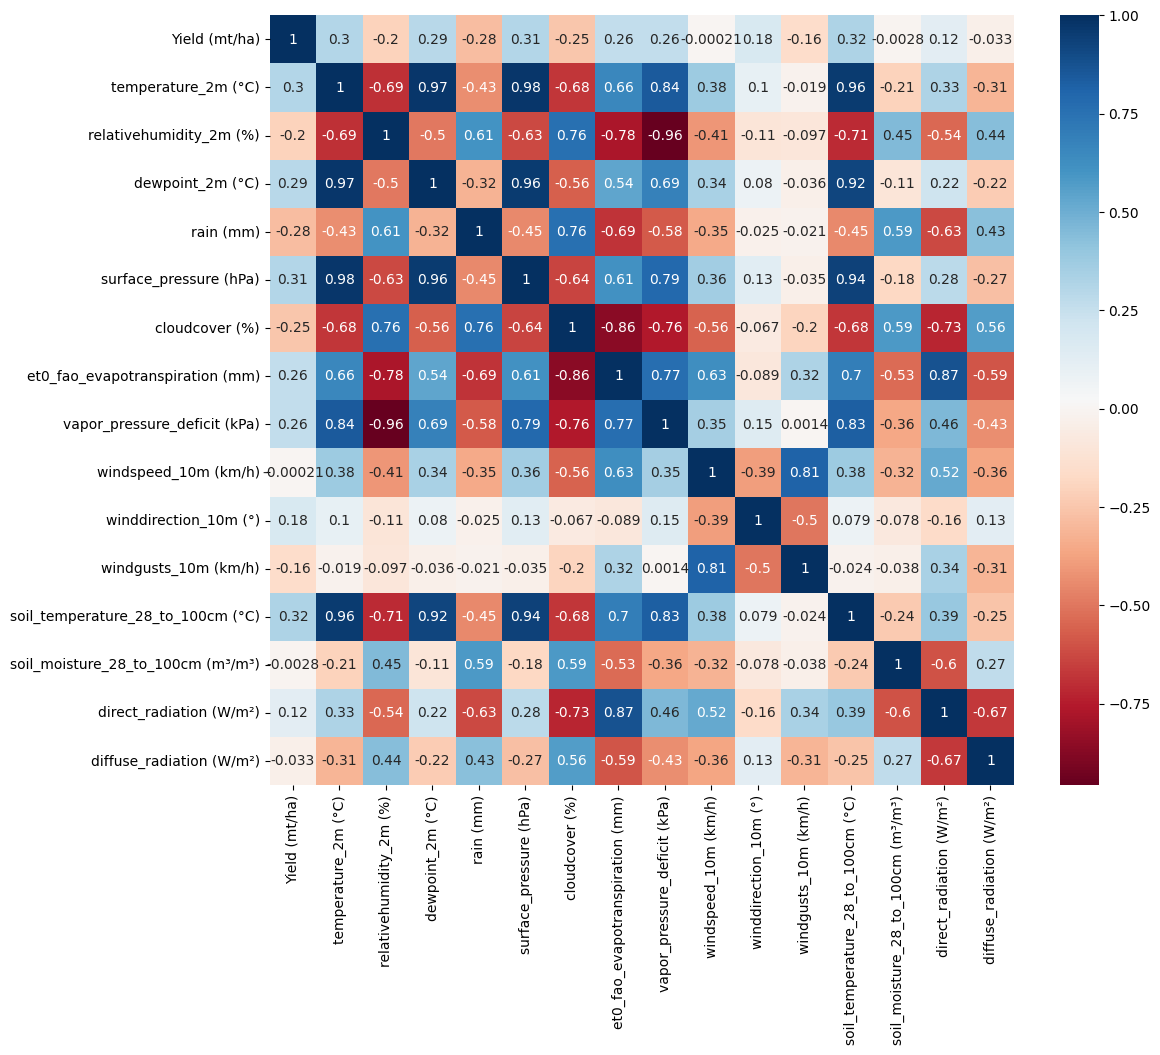

In [40]:
#Using Pearson Correlation

plt.figure(figsize=(12,10))
cor = df1.corr()
sns.heatmap(cor, annot=True, cmap='RdBu')
plt.show()

In [9]:
# name of the label (can be seen in the dataframe)
label = 'Yield (mt/ha)'

# list with feature names
features = df1.columns.tolist()
features.remove(label)

In [10]:
from scipy.stats import pearsonr
from math import sqrt

def getMerit(subset, label):
    k = len(subset)

    # average feature-yield correlation
    rcf_all = []
    for feature in subset:
        coeff = pearsonr( df1[label], df1[feature] )
        rcf_all.append( abs( coeff.correlation ) )
    rcf = np.mean( rcf_all )

    # average feature-feature correlation
    corr = df1[subset].corr()
    corr.values[np.tril_indices_from(corr.values)] = np.nan
    corr = abs(corr)
    rff = corr.unstack().mean()

    return (k * rcf) / sqrt(k + k * (k-1) * rff)

In [33]:
df1

Yield (mt/ha)                        float64
weathercode (wmo code)               float64
temperature_2m (°C)                  float64
relativehumidity_2m (%)              float64
dewpoint_2m (°C)                     float64
rain (mm)                            float64
surface_pressure (hPa)               float64
cloudcover (%)                       float64
et0_fao_evapotranspiration (mm)      float64
vapor_pressure_deficit (kPa)         float64
windspeed_10m (km/h)                 float64
winddirection_10m (°)                float64
windgusts_10m (km/h)                 float64
soil_temperature_28_to_100cm (°C)    float64
soil_moisture_28_to_100cm (m³/m³)    float64
direct_radiation (W/m²)              float64
diffuse_radiation (W/m²)             float64
dtype: object

In [50]:
corr_matrix = df1.corr()
corr_matrix

,Yield (mt/ha),weathercode (wmo code),temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),rain (mm),surface_pressure (hPa),cloudcover (%),et0_fao_evapotranspiration (mm),vapor_pressure_deficit (kPa),windspeed_10m (km/h),winddirection_10m (°),windgusts_10m (km/h),soil_temperature_28_to_100cm (°C),soil_moisture_28_to_100cm (m³/m³),direct_radiation (W/m²),diffuse_radiation (W/m²)
Yield (mt/ha),1.000000,-0.155738,0.304455,-0.202544,0.293403,-0.284270,0.307986,-0.253446,0.260123,0.263751,-0.000208,0.179835,-0.158009,0.322548,-0.002764,0.121666,-0.033213
weathercode (wmo code),-0.155738,1.000000,-0.103810,0.171066,-0.065200,0.385519,-0.116464,0.279892,-0.182960,-0.173396,0.053932,-0.086333,0.124845,-0.097291,0.168846,-0.236088,0.297857
temperature_2m (°C),0.304455,-0.103810,1.000000,-0.690982,0.969706,-0.431921,0.975111,-0.675047,0.660501,0.841391,0.378489,0.102565,-0.018601,0.959173,-0.206396,0.326362,-0.309135
relativehumidity_2m (%),-0.202544,0.171066,-0.690982,1.000000,-0.496131,0.609277,-0.628437,0.760944,-0.778492,-0.957786,-0.410294,-0.106703,-0.096662,-0.708807,0.452285,-0.544752,0.437343
dewpoint_2m (°C),0.293403,-0.065200,0.969706,-0.496131,1.000000,-0.319341,0.961318,-0.562658,0.539537,0.685553,0.340633,0.080140,-0.035719,0.917306,-0.106713,0.221890,-0.224318
rain (mm),-0.284270,0.385519,-0.431921,0.609277,-0.319341,1.000000,-0.448744,0.756732,-0.685490,-0.580773,-0.346350,-0.025097,-0.021027,-0.452614,0.586406,-0.628248,0.433900
surface_pressure (hPa),0.307986,-0.116464,0.975111,-0.628437,0.961318,-0.448744,1.000000,-0.642978,0.610710,0.786554,0.363276,0.129424,-0.034718,0.935726,-0.182107,0.284957,-0.272619
cloudcover (%),-0.253446,0.279892,-0.675047,0.760944,-0.562658,0.756732,-0.642978,1.000000,-0.863793,-0.759547,-0.557222,-0.066693,-0.198269,-0.675516,0.586145,-0.725302,0.564736
et0_fao_evapotranspiration (mm),0.260123,-0.182960,0.660501,-0.778492,0.539537,-0.685490,0.610710,-0.863793,1.000000,0.767257,0.630782,-0.089276,0.319536,0.699881,-0.529902,0.873890,-0.592190
vapor_pressure_deficit (kPa),0.263751,-0.173396,0.841391,-0.957786,0.685553,-0.580773,0.786554,-0.759547,0.767257,1.000000,0.351558,0.147421,0.001360,0.829664,-0.355203,0.463442,-0.434130


In [51]:
corr_matrix.values[np.tril_indices_from(corr.values)] = np.nan
corr_matrix

,Yield (mt/ha),weathercode (wmo code),temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),rain (mm),surface_pressure (hPa),cloudcover (%),et0_fao_evapotranspiration (mm),vapor_pressure_deficit (kPa),windspeed_10m (km/h),winddirection_10m (°),windgusts_10m (km/h),soil_temperature_28_to_100cm (°C),soil_moisture_28_to_100cm (m³/m³),direct_radiation (W/m²),diffuse_radiation (W/m²)
Yield (mt/ha),NaN,-0.155738,0.304455,-0.202544,0.293403,-0.284270,0.307986,-0.253446,0.260123,0.263751,-0.000208,0.179835,-0.158009,0.322548,-0.002764,0.121666,-0.033213
weathercode (wmo code),NaN,NaN,-0.103810,0.171066,-0.065200,0.385519,-0.116464,0.279892,-0.182960,-0.173396,0.053932,-0.086333,0.124845,-0.097291,0.168846,-0.236088,0.297857
temperature_2m (°C),NaN,NaN,NaN,-0.690982,0.969706,-0.431921,0.975111,-0.675047,0.660501,0.841391,0.378489,0.102565,-0.018601,0.959173,-0.206396,0.326362,-0.309135
relativehumidity_2m (%),NaN,NaN,NaN,NaN,-0.496131,0.609277,-0.628437,0.760944,-0.778492,-0.957786,-0.410294,-0.106703,-0.096662,-0.708807,0.452285,-0.544752,0.437343
dewpoint_2m (°C),NaN,NaN,NaN,NaN,NaN,-0.319341,0.961318,-0.562658,0.539537,0.685553,0.340633,0.080140,-0.035719,0.917306,-0.106713,0.221890,-0.224318
rain (mm),NaN,NaN,NaN,NaN,NaN,NaN,-0.448744,0.756732,-0.685490,-0.580773,-0.346350,-0.025097,-0.021027,-0.452614,0.586406,-0.628248,0.433900
surface_pressure (hPa),NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.642978,0.610710,0.786554,0.363276,0.129424,-0.034718,0.935726,-0.182107,0.284957,-0.272619
cloudcover (%),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.863793,-0.759547,-0.557222,-0.066693,-0.198269,-0.675516,0.586145,-0.725302,0.564736
et0_fao_evapotranspiration (mm),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.767257,0.630782,-0.089276,0.319536,0.699881,-0.529902,0.873890,-0.592190
vapor_pressure_deficit (kPa),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.351558,0.147421,0.001360,0.829664,-0.355203,0.463442,-0.434130


In [52]:
to_drop = [column for column in corr_matrix.columns if any(corr_matrix[column] > 0.9)]
print(to_drop)

['dewpoint_2m (°C)', 'surface_pressure (hPa)', 'soil_temperature_28_to_100cm (°C)']


In [13]:
corr.values[np.tril_indices_from(corr.values)] = np.nan
corr

,weathercode (wmo code),temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C)
weathercode (wmo code),NaN,-0.10381,0.171066,-0.065200
temperature_2m (°C),NaN,NaN,-0.690982,0.969706
relativehumidity_2m (%),NaN,NaN,NaN,-0.496131
dewpoint_2m (°C),NaN,NaN,NaN,NaN


In [50]:
from scipy.stats import pearsonr 

best_value = -1
best_feature = ''
for feature in features:
    coeff = pearsonr( df1[label], df1[feature] )
    abs_coeff = abs( coeff.correlation )
    if abs_coeff > best_value:
        best_value = abs_coeff
        best_feature = feature

print("Feature %s with merit %.4f"%(best_feature, best_value))

AttributeError: 'tuple' object has no attribute 'correlation'

In [15]:
class PriorityQueue:
    def  __init__(self):
        self.queue = []

    def isEmpty(self):
        return len(self.queue) == 0
    
    def push(self, item, priority):
        """
        item already in priority queue with smaller priority:
        -> update its priority
        item already in priority queue with higher priority:
        -> do nothing
        if item not in priority queue:
        -> push it
        """
        for index, (i, p) in enumerate(self.queue):
            if (set(i) == set(item)):
                if (p >= priority):
                    break
                del self.queue[index]
                self.queue.append( (item, priority) )
                break
        else:
            self.queue.append( (item, priority) )
        
    def pop(self):
        # return item with highest priority and remove it from queue
        max_idx = 0
        for index, (i, p) in enumerate(self.queue):
            if (self.queue[max_idx][1] < p):
                max_idx = index
        (item, priority) = self.queue[max_idx]
        del self.queue[max_idx]
        return (item, priority)

In [16]:
# initialize queue
queue = PriorityQueue()

# push first tuple (subset, merit)
queue.push([best_feature], best_value)

In [17]:
# list for visited nodes
visited = []

# counter for backtracks
n_backtrack = 0

# limit of backtracks
max_backtrack = 5

In [19]:
# repeat until queue is empty
# or the maximum number of backtracks is reached
while not queue.isEmpty():
    # get element of queue with highest merit
    subset, priority = queue.pop()
    
    # check whether the priority of this subset
    # is higher than the current best subset
    if (priority < best_value):
        n_backtrack += 1
    else:
        best_value = priority
        best_subset = subset

    # goal condition
    if (n_backtrack == max_backtrack):
        break
    
    # iterate through all features and look of one can
    # increase the merit
    for feature in features:
        temp_subset = subset + [feature]
        
        # check if this subset has already been evaluated
        for node in visited:
            if (set(node) == set(temp_subset)):
                break
        # if not, ...
        else:
            # ... mark it as visited
            visited.append( temp_subset )
            # ... compute merit
            merit = getMerit(temp_subset, label)
            # and push it to the queue
            queue.push(temp_subset, merit)

## Feature Selection (VIF)

In [96]:
# load the dataset
df1 = pd.read_csv('Without_Outliers.csv')
df1.head(3)

,Unnamed: 0,Year,Location,Production (mt),Area (ha),Yield (mt/ha),weathercode (wmo code),temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),...,cloudcover (%),et0_fao_evapotranspiration (mm),vapor_pressure_deficit (kPa),windspeed_10m (km/h),winddirection_10m (°),windgusts_10m (km/h),soil_temperature_28_to_100cm (°C),soil_moisture_28_to_100cm (m³/m³),direct_radiation (W/m²),diffuse_radiation (W/m²)
0,0,1990,ZAMBOANGA DEL NORTE,41.14,91.0,0.452088,3,23.486279,86.200457,20.899235,...,70.154680,0.153233,0.435739,6.732808,144.312329,19.894932,25.227021,0.401853,151.119064,70.720548
1,1,1991,ZAMBOANGA DEL NORTE,53.28,108.0,0.493333,3,23.378607,86.403995,20.856210,...,71.524658,0.153091,0.422427,6.505616,138.691096,19.141393,25.074669,0.404063,147.845890,75.080251
2,2,1992,ZAMBOANGA DEL NORTE,71.34,114.0,0.625789,3,23.253153,86.111225,20.664014,...,66.843010,0.154016,0.430523,5.957605,143.278233,18.114481,25.086202,0.399902,149.374203,74.632628


In [107]:
df1.columns

Index(['Production (mt)', 'Area (ha)', 'Yield (mt/ha)',
       'weathercode (wmo code)', 'temperature_2m (°C)',
       'relativehumidity_2m (%)', 'dewpoint_2m (°C)', 'rain (mm)',
       'surface_pressure (hPa)', 'cloudcover (%)',
       'et0_fao_evapotranspiration (mm)', 'vapor_pressure_deficit (kPa)',
       'windspeed_10m (km/h)', 'winddirection_10m (°)', 'windgusts_10m (km/h)',
       'soil_temperature_28_to_100cm (°C)',
       'soil_moisture_28_to_100cm (m³/m³)', 'direct_radiation (W/m²)',
       'diffuse_radiation (W/m²)'],
      dtype='object')

In [110]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x = df1.drop('Yield (mt/ha)', axis=1)
y = df1['Yield (mt/ha)']

In [111]:
def cal_vif(x):
    thresh = 5
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    for i in range(1,k):
        print('Iteration no ', i)
        print(vif)
        a = np.argmax(vif)
        print('Max vif is for variable no : ', a)
        if(vif[a]<=thresh):
            break
        if(i==1):
            output = x.drop(x.columns[a],axis=1)
            vif = [variance_inflation_factor(output.values,j) for j in range(output.shape[1])]
        elif(i>1):
            output = output.drop(output.columns[a],axis=1)
            vif = [variance_inflation_factor(output.values,j) for j in range(output.shape[1])]
    return(output)
    
selected_features = cal_vif(x)
selected_features.head()


Iteration no  1
[9.697404127892552, 11.627018921311176, 1.6906436490198176, 261882.60025036984, 7907.04343517523, 150183.81222746408, 32.452042010101806, 16365.39703175106, 329.1248504309986, 6710.164537686099, 4251.534641526658, 44.34980464814736, 77.6883405261041, 211.00627084137295, 3646.088264414718, 59.79890053621965, 1951.354742791754, 1667.5525323985396]
Max vif is for variable no :  3
Iteration no  2
[9.038949644328843, 11.002779486329835, 1.6905424858346976, 7326.774482718434, 3687.469793323681, 30.641090656529258, 15507.971412441346, 327.9118607008732, 6234.8158410232445, 445.23098251195256, 44.08630329580957, 76.74900259076891, 208.64561675115377, 3574.4658131241313, 57.631302252158505, 1719.4267544705913, 1479.5339978520542]
Max vif is for variable no :  6
Iteration no  3
[9.010444178303635, 10.977452773660056, 1.6902528972053248, 3380.8791538468904, 2080.4257030769995, 26.60367261383415, 325.86609052530554, 5827.002419402562, 229.12135310427553, 42.30126435899621, 72.32477

,Production (mt),weathercode (wmo code),rain (mm),windspeed_10m (km/h)
0,41.14,3.0,0.365126,6.732808
1,53.28,3.0,0.292443,6.505616
2,71.34,3.0,0.320560,5.957605
3,78.88,3.0,0.413082,5.702637
4,85.71,3.0,0.391427,5.919954


## Random Forest Variable Importance (not finished)

In [63]:
pip install shap

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [64]:
# Let's load the packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [87]:
X = np.array(df1.drop('Yield (mt/ha)', axis= 1))
y = np.array(df1['Yield (mt/ha)'])
feature_names = np.array(df1.columns.tolist())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [88]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [89]:
rf.feature_importances_

array([5.15891124e-01, 8.48601700e-02, 3.46324585e-04, 2.27788665e-02,
       3.28868563e-03, 1.63850525e-02, 6.66249558e-03, 4.60297732e-02,
       8.68671718e-03, 3.89856452e-03, 4.64132425e-03, 2.38532683e-01,
       9.25079997e-03, 7.28544897e-03, 1.93819565e-02, 4.90176231e-03,
       3.02134948e-03, 4.15690174e-03])

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 2 with shape (18,) and arg 3 with shape (19,).

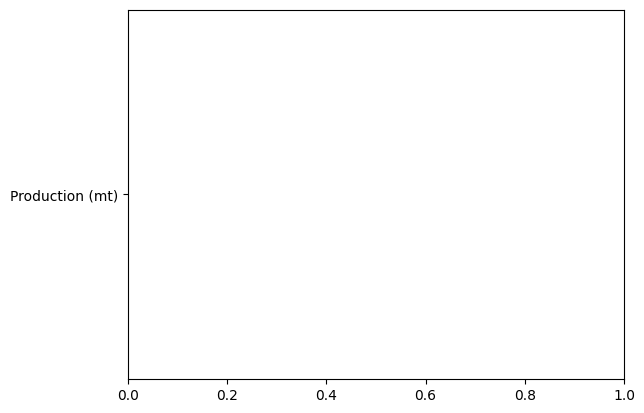

In [90]:
plt.barh(feature_names, rf.feature_importances_)

## Pearson Correlation Filter Method

In [112]:
corr = df1.corr()
corr

,Production (mt),Area (ha),Yield (mt/ha),weathercode (wmo code),temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),rain (mm),surface_pressure (hPa),cloudcover (%),et0_fao_evapotranspiration (mm),vapor_pressure_deficit (kPa),windspeed_10m (km/h),winddirection_10m (°),windgusts_10m (km/h),soil_temperature_28_to_100cm (°C),soil_moisture_28_to_100cm (m³/m³),direct_radiation (W/m²),diffuse_radiation (W/m²)
Production (mt),1.000000,0.892005,0.362329,0.045114,-0.135877,-0.046444,-0.187055,0.077924,-0.154270,0.090580,-0.078328,0.013394,-0.215099,0.281473,-0.110376,-0.158343,0.025589,-0.135436,0.126524
Area (ha),0.892005,1.000000,0.120623,0.082018,-0.314524,0.101371,-0.352014,0.223414,-0.331273,0.273288,-0.219101,-0.145882,-0.290406,0.264893,-0.081164,-0.343047,0.082138,-0.205838,0.125828
Yield (mt/ha),0.362329,0.120623,1.000000,-0.155738,0.304455,-0.202544,0.293403,-0.284270,0.307986,-0.253446,0.260123,0.263751,-0.000208,0.179835,-0.158009,0.322548,-0.002764,0.121666,-0.033213
weathercode (wmo code),0.045114,0.082018,-0.155738,1.000000,-0.103810,0.171066,-0.065200,0.385519,-0.116464,0.279892,-0.182960,-0.173396,0.053932,-0.086333,0.124845,-0.097291,0.168846,-0.236088,0.297857
temperature_2m (°C),-0.135877,-0.314524,0.304455,-0.103810,1.000000,-0.690982,0.969706,-0.431921,0.975111,-0.675047,0.660501,0.841391,0.378489,0.102565,-0.018601,0.959173,-0.206396,0.326362,-0.309135
relativehumidity_2m (%),-0.046444,0.101371,-0.202544,0.171066,-0.690982,1.000000,-0.496131,0.609277,-0.628437,0.760944,-0.778492,-0.957786,-0.410294,-0.106703,-0.096662,-0.708807,0.452285,-0.544752,0.437343
dewpoint_2m (°C),-0.187055,-0.352014,0.293403,-0.065200,0.969706,-0.496131,1.000000,-0.319341,0.961318,-0.562658,0.539537,0.685553,0.340633,0.080140,-0.035719,0.917306,-0.106713,0.221890,-0.224318
rain (mm),0.077924,0.223414,-0.284270,0.385519,-0.431921,0.609277,-0.319341,1.000000,-0.448744,0.756732,-0.685490,-0.580773,-0.346350,-0.025097,-0.021027,-0.452614,0.586406,-0.628248,0.433900
surface_pressure (hPa),-0.154270,-0.331273,0.307986,-0.116464,0.975111,-0.628437,0.961318,-0.448744,1.000000,-0.642978,0.610710,0.786554,0.363276,0.129424,-0.034718,0.935726,-0.182107,0.284957,-0.272619
cloudcover (%),0.090580,0.273288,-0.253446,0.279892,-0.675047,0.760944,-0.562658,0.756732,-0.642978,1.000000,-0.863793,-0.759547,-0.557222,-0.066693,-0.198269,-0.675516,0.586145,-0.725302,0.564736


In [114]:
threshold=0.5
a=abs(corr['Yield (mt/ha)'])
result=a[a>0.5]
result 

Yield (mt/ha)    1.0
Name: Yield (mt/ha), dtype: float64